In [1]:
from common_import import *

### Check torch function

In [2]:
checkpoint = 'MB_train_h36m_gt_cam_no_factor_input_from_canonical_pcl_original'
args, opts = get_opt_args_from_model_name(checkpoint, mode='best')
train_loader, test_loader, _, _, datareader = load_dataset(args, use_new_datareader=True)
#train_cam_param, test_cam_param = datareader.datareader[args.subset_list[0]].get_sliced_cam_param()

configs/pose3d/MB_train_h36m_gt_cam_no_factor_input_from_canonical_pcl_original.yaml
True
Loading dataset...
H36M-GT-CAM_NO_FACTOR-INPUT_FROM_CANONICAL_PCL_ORIGINAL
[overwrite: False] ==> Loading H36M source_list...
[overwrite: False] ==> Loading H36M cam_param...
[overwrite: False] ==> Loading H36M cam_3d...
[overwrite: False] ==> Loading H36M cam_3d_canonical_pcl_original...
[overwrite: False] ==> Loading H36M img_2d_canonical_pcl_original...
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [3]:
args.mask = (args.mask_ratio > 0 and args.mask_T_ratio > 0)
args.rootrel = False
args.fix_orientation_gt = True

with torch.no_grad():
    for batch_input, batch_gt, batch_cam_param in test_loader: # batch_input: normalized joint_2d, batch_gt: normalized joint3d_image
        batch_size = len(batch_input)
        batch_gt_original = batch_gt.clone().detach().cuda()
        batch_input, batch_gt, batch_gt_torso, batch_gt_limb_pos = preprocess_eval(args, batch_input, batch_gt)
        batch_gt_back = postprocess_eval(args, batch_gt, batch_gt_original, batch_input)
        break

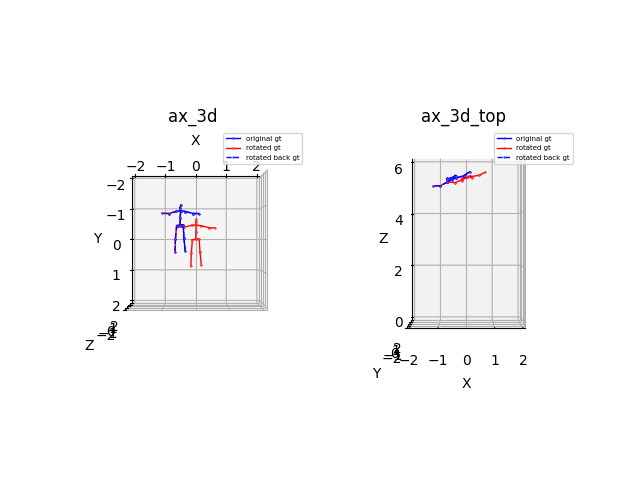

In [4]:
%matplotlib widget
batch_num = 0
pose3d = batch_gt_original.clone().detach().cpu().numpy()[batch_num]
rotated_3d = batch_gt.clone().detach().cpu().numpy()[batch_num]
rotated_back_3d = batch_gt_back.clone().detach().cpu().numpy()[batch_num]

frame_num = 0
configs = {
    'ax_3d': {'type': '3d', 'loc': 121, 'mode': 'cam'},
    'ax_3d_top': {'type': '3d', 'loc': 122, 'mode': 'cam_top', 'zlim': [0, 6]},
}
fig, axs = generate_axes(2, configs, fig_title='')
plot_pose_setting = [
    ('ax_3d', pose3d,           {'color': '', 'label': 'original gt'}),
    ('ax_3d', rotated_3d,           {'color': 'r', 'label': 'rotated gt'}),
    ('ax_3d', rotated_back_3d,           {'color': 'b', 'label': 'rotated back gt', 'linestyle': '--'}),
    ('ax_3d_top', pose3d,           {'color': '', 'label': 'original gt'}),
    ('ax_3d_top', rotated_3d,           {'color': 'r', 'label': 'rotated gt'}),
    ('ax_3d_top', rotated_back_3d,           {'color': 'b', 'label': 'rotated back gt', 'linestyle': '--'}),
]
general_plot_func(axs, configs, plot_pose_setting, frame_num)
plt.show()